In [40]:
#In this model - I only changed the data augmentation parameters

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd

# Setting weights to the train class_weights

In [13]:
#setting class_weights based on the class 10. 
#Essentially we treating every instance of the classes as instances of class 10
# For example weight of 4 for class 0 means: 
    #treat every instance of class 0 as 4 instances of class 10

class_weight = {0:4. ,
                1:2., 
                2:1.5 ,
                3:2.,
                4:3.,
                5:2.,
                6:1.5,
                7:4.,
                8:2.,
                9:3.,
                10:1.,
                11:4.,
                12:3.,
                13:2.,
                14:3.,
                15:2.
               }

# Loading the images into train and validation sets

Load the images

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#setting the directory for the train dataset
directory = r"../raw_data/train"

In [5]:
#augmenting the data 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        vertical_flip=True,
        width_shift_range=0.3,
        rotation_range=90,
        brightness_range=(0.1, 0.9),
        validation_split = 0.2)

valid_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split = 0.2)

In [6]:
img_height, img_width = (256,256)

In [7]:
train_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed = 123) # set as training data

validation_generator = valid_datagen.flow_from_directory(
    directory, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed = 123) # set as validation data

Found 3460 images belonging to 16 classes.
Found 857 images belonging to 16 classes.


# Training baseline model

In [8]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
num_classes = 16

model = Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, input_shape=(img_height, img_width, 3),padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [10]:
import tensorflow.keras.losses

model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

In [14]:
epochs=10
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    class_weight=class_weight,
    epochs = epochs)

Epoch 1/10
108/108 [==============================] - 108s 1s/step - loss: 5.8651 - accuracy: 0.1024 - val_loss: 2.5479 - val_accuracy: 0.1731
Epoch 2/10
108/108 [==============================] - 100s 929ms/step - loss: 5.3398 - accuracy: 0.2127 - val_loss: 2.2688 - val_accuracy: 0.3125
Epoch 3/10
108/108 [==============================] - 101s 932ms/step - loss: 4.8809 - accuracy: 0.2605 - val_loss: 2.1765 - val_accuracy: 0.3510
Epoch 4/10
108/108 [==============================] - 102s 940ms/step - loss: 4.6557 - accuracy: 0.3148 - val_loss: 2.2376 - val_accuracy: 0.3317
Epoch 5/10
108/108 [==============================] - 105s 969ms/step - loss: 4.3947 - accuracy: 0.3320 - val_loss: 2.0132 - val_accuracy: 0.4087
Epoch 6/10
108/108 [==============================] - 103s 954ms/step - loss: 4.2815 - accuracy: 0.3541 - val_loss: 2.4088 - val_accuracy: 0.3317
Epoch 7/10
108/108 [==============================] - 102s 944ms/step - loss: 4.1237 - accuracy: 0.3725 - val_loss: 2.2508 - va

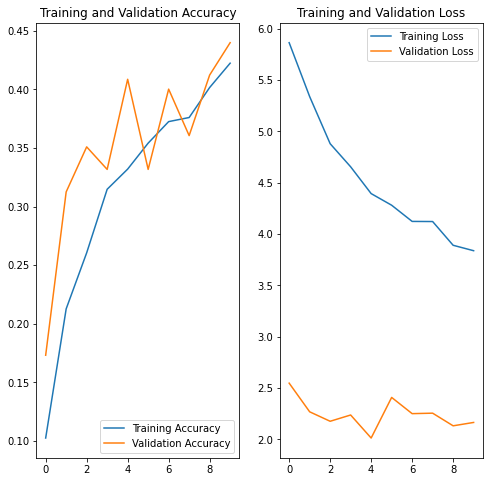

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
model.save(r'../model/cnn_2_rm')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ../model/cnn_2_rm/assets


# Checking succession rate

#### Loading test csv

In [20]:
import pandas as pd
test_df = pd.read_csv("../plantbase/data/test_data.csv").drop(columns = "Unnamed: 0")

In [21]:
test_df = test_df[['id', 'genus']]
test_df.head()

,id,genus
0,100035,Verbascum
1,100058,Trifolium
2,100186,Veronica
3,100238,Campanula
4,1003,Geranium


In [23]:
import numpy as np
columns = np.sort(test_df.genus.unique())
columns

array(['Ajuga', 'Allium', 'Campanula', 'Cirsium', 'Crataegus', 'Gentiana',
       'Geranium', 'Iris', 'Malva', 'Narcissus', 'Ophrys', 'Rosa',
       'Trifolium', 'Verbascum', 'Veronica', 'Viola'], dtype=object)

In [24]:
rename_columns = {}
col_index = 0
for n in columns:
    rename_columns[col_index] = n
    col_index += 1
    
rename_columns

{0: 'Ajuga',
 1: 'Allium',
 2: 'Campanula',
 3: 'Cirsium',
 4: 'Crataegus',
 5: 'Gentiana',
 6: 'Geranium',
 7: 'Iris',
 8: 'Malva',
 9: 'Narcissus',
 10: 'Ophrys',
 11: 'Rosa',
 12: 'Trifolium',
 13: 'Verbascum',
 14: 'Veronica',
 15: 'Viola'}

#### Loading test images using tensorflow load_img and img_to_array

In [25]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [26]:
X_list = []
y_list = []

for index, row in test_df.iterrows():
    img = load_img(rf"../raw_data/test/{row.id}.jpg", target_size=(256, 256))
    img = tensorflow.keras.preprocessing.image.img_to_array(img)
    #img = tensorflow.expand_dims(img, 0)
    X_list.append(img)
    y_list.append((row.genus, row.id))

In [27]:
y_true_df = pd.DataFrame(y_list, columns = ['true_genus', 'id'])
y_true_df.head()

,true_genus,id
0,Verbascum,100035
1,Trifolium,100058
2,Veronica,100186
3,Campanula,100238
4,Geranium,1003


In [28]:
X_test = np.stack(X_list, axis=0)

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred.shape

(1341, 16)

In [31]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.rename(columns = rename_columns)
y_pred_df.head()

,Ajuga,Allium,Campanula,Cirsium,Crataegus,Gentiana,Geranium,Iris,Malva,Narcissus,Ophrys,Rosa,Trifolium,Verbascum,Veronica,Viola
0,-285.933502,-2118.197998,-1176.220093,-3163.041748,-1924.844482,2217.587402,-1922.501465,3352.841309,-4929.559082,3000.468262,2179.360352,-401.211456,-1010.747009,3593.494873,-1802.197021,2668.940430
1,2426.232422,-330.194641,-567.814514,6.692516,-1428.028687,3461.447266,1236.590332,1336.542969,-1586.555176,-3421.212158,-989.946411,441.172363,1889.692017,19.945452,3356.204346,-790.923523
2,549.941711,-362.000854,317.960785,-415.623718,-781.978088,560.017883,-101.627243,114.272804,-535.536011,-510.481812,54.246185,-618.681091,-240.110413,-85.314590,447.937042,334.795013
3,-935.699707,374.205078,132.452972,2723.860596,-3890.352051,-1452.978271,1085.764282,1819.084351,2144.253418,-4551.235352,-586.116272,-228.725342,336.069214,-1476.329590,-3009.104492,-298.614532
4,707.021179,237.021027,1574.736816,172.984390,-1857.806152,136.939514,1559.512817,730.687988,825.971619,-1688.931030,932.374268,-742.151245,343.940125,-2025.420166,-30.391790,1596.375610


In [32]:
y_true = np.stack(y_list, axis = 0)

In [33]:
y_pred_df['pred_genus'] = y_pred_df.idxmax(axis = 1)
y_pred_df['pred_genus']

0       Verbascum
1        Gentiana
2        Gentiana
3         Cirsium
4           Viola
5         Cirsium
6          Ophrys
7            Iris
8       Trifolium
9       Campanula
10         Allium
11       Geranium
12      Campanula
13          Malva
14        Cirsium
15         Ophrys
16      Campanula
17        Cirsium
18           Iris
19        Cirsium
20        Cirsium
21         Allium
22      Campanula
23      Campanula
24         Allium
25         Ophrys
26      Verbascum
27       Geranium
28           Iris
29           Iris
          ...    
1311        Viola
1312         Rosa
1313     Gentiana
1314      Cirsium
1315      Cirsium
1316        Malva
1317    Campanula
1318       Ophrys
1319        Malva
1320    Trifolium
1321      Cirsium
1322        Viola
1323       Allium
1324      Cirsium
1325        Malva
1326     Gentiana
1327      Cirsium
1328         Rosa
1329        Viola
1330         Iris
1331         Rosa
1332    Crataegus
1333      Cirsium
1334      Cirsium
1335    Cr

In [34]:
prediction_review = (y_pred_df['pred_genus'] == y_true_df['true_genus'])

In [35]:
prediction_vec_df = y_pred_df[['pred_genus']].copy()
prediction_vec_df['true_genus'] = y_true_df['true_genus'].copy()
prediction_vec_df['result'] = (y_pred_df['pred_genus'] == y_true_df['true_genus'])

In [36]:
prediction_vec_df['false'] = prediction_vec_df['result'].apply(lambda x: 1 if x == False else 0)
prediction_vec_df['true'] = prediction_vec_df['result'].apply(lambda x: 1 if x == True else 0)
prediction_vec_df.head(2)

,pred_genus,true_genus,result,false,true
0,Verbascum,Verbascum,True,0,1
1,Gentiana,Trifolium,False,1,0


In [37]:
true_pos_neg = prediction_vec_df.groupby('true_genus').sum().drop(columns=['result'])
true_pos_neg['percent_true'] = true_pos_neg['true'] / (true_pos_neg['true'] + true_pos_neg['false'])

In [38]:
success_ratio = round(true_pos_neg[['percent_true']]*100).sort_values(by='percent_true', ascending=False)

In [39]:
success_ratio

,percent_true
true_genus,
Cirsium,72.0
Verbascum,64.0
Crataegus,56.0
Ajuga,52.0
Gentiana,52.0
Rosa,47.0
Ophrys,46.0
Iris,43.0
Malva,41.0
